In [1]:
!pip install matplotlib
!pip install pandas
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
data_major_clean = pd.read_csv(r'C:\Users\asus\project\data_major_clean.csv')
data_humanities_score_clean = pd.read_csv(r'C:\Users\asus\project\data_score_humanities_clean.csv')
data_science_score_clean = pd.read_csv(r'C:\Users\asus\project\data_score_science_clean.csv')

data_major_clean.set_index("id_major", inplace=True)

In [80]:
#reset index
data_major_clean = data_major_clean.reset_index()

In [81]:
data_major_clean.head()

,id_major,id_university,type,major_name,capacity,university_name
0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA
1,1111022,111,science,TEKNIK SIPIL,64,UNIVERSITAS SYIAH KUALA
2,1111037,111,science,TEKNIK MESIN,48,UNIVERSITAS SYIAH KUALA
3,1111045,111,science,TEKNIK KIMIA,48,UNIVERSITAS SYIAH KUALA
4,1111053,111,science,ARSITEKTUR,48,UNIVERSITAS SYIAH KUALA


In [82]:
#data universitas unila
data_univ = data_major_clean[['id_university','university_name']].copy()

In [83]:
#data major unila
data_major_univ = data_major_clean[['id_major','major_name','capacity']].copy()

In [85]:
#data science score science unila
data_univ_unila = data_univ[(data_univ.university_name == 'UNIVERSITAS LAMPUNG')]

In [86]:
#rapihkan data data score science
data_science_score_clean.drop(data_science_score_clean.columns[0],axis=1,inplace=True)

In [87]:
#membuat dataframe
data_science_score_science_unila = data_science_score_clean[(data_science_score_clean.type == 'science')
                                                            &(data_science_score_clean.id_university == 191)]

In [88]:
#menggabungkan dataframe dengan major
data_science_score_science_unila = data_science_score_science_unila.merge(data_major_univ,on='id_major',how='left')

visualisasi data 10 MOST SCIENCE TYPE IN THE FIRST CHOICE AT LAMPUNG UNIVERSITY

In [89]:
#eksekusi data
data_choice_1 = data_science_score_science_unila[(data_science_score_science_unila.choice == 1)]
data_choice_1 = data_choice_1.groupby(by='id_major').count().sort_values(by='choice',ascending=False)[0:10]
data_choice_1 = data_choice_1.reset_index().merge(data_major_univ,on='id_major',how='left')

In [90]:
#membuat dataframe baru
data_choice_1.columns
columns_to_keep = ['choice', 'major_name_y']
summary_data_choice_1 = data_choice_1[columns_to_keep]
summary_data_choice_1

,choice,major_name_y
0,231,PEND. KEDOKTERAN
1,79,TEKNIK SIPIL
2,69,FARMASI
3,58,TEKNIK INFORMATIKA
4,56,AGRIBISNIS
5,53,ILMU KOMPUTER
6,46,TEKNIK KIMIA
7,44,KIMIA
8,41,BIOLOGI
9,41,MATEMATIKA


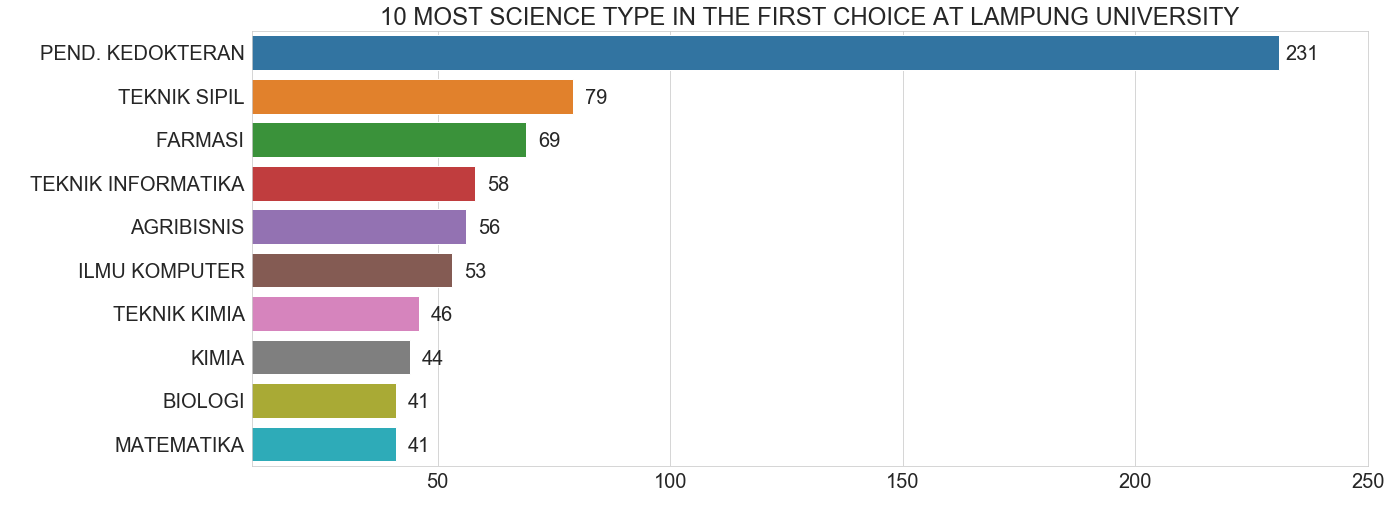

In [91]:
#visualisasi
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=summary_data_choice_1, x='choice', y='major_name_y')
plt.xlim(10,250)
plt.ylabel('MAJOR', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('10 MOST SCIENCE TYPE IN THE FIRST CHOICE AT LAMPUNG UNIVERSITY')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')
        
plt.show()

INFO DETAIL VISUALISASI DATA DI ATAS DENGAN TABLE

In [104]:
data_choice_1_table= data_science_score_science_unila[(data_science_score_science_unila.choice == 1)]
data_choice_1_table= data_choice_1_table.groupby(by=['major_name','capacity'])[['avg_score','choice']].agg({'avg_score':'mean','choice':'sum'})

In [105]:
data_choice_1_table

,,avg_score,choice
major_name,capacity,,
AGRIBISNIS,54,503.571429,56
AGRONOMI,45,490.389706,17
AGROTEKNOLOGI,31,511.509615,26
ARSITEKTUR,28,523.633929,28
BIOLOGI,45,499.271341,41
BIOLOGI TERAPAN,18,470.531250,4
BUDIDAYA PERAIRAN,31,493.397727,11
FARMASI,32,502.626812,69
FISIKA,63,503.895833,12


visualisasi data 10 MOST SCIENCE TYPE IN THE SECOND CHOICE AT LAMPUNG UNIVERSITY

In [107]:
data_choice_2 = data_science_score_science_unila[(data_science_score_science_unila.choice == 2)]
data_choice_2 = data_choice_2.groupby(by='id_major').count().sort_values(by='choice',ascending=False)[0:10]
data_choice_2 = data_choice_2.reset_index().merge(data_major_univ,on='id_major',how='left')

In [108]:
#membuat dataframe baru
data_choice_2.columns
columns_to_keep = ['choice', 'major_name_y']
summary_data_choice_2 = data_choice_2[columns_to_keep]
summary_data_choice_2

,choice,major_name_y
0,185,PEND. KEDOKTERAN
1,109,FARMASI
2,73,TEKNIK SIPIL
3,58,TEKNIK INFORMATIKA
4,53,AGRIBISNIS
5,46,MATEMATIKA
6,45,TEKNIK KIMIA
7,40,TEKNIK ELEKTRO
8,38,ILMU KOMPUTER
9,37,TEKNOLOGI HASIL PERTANIAN


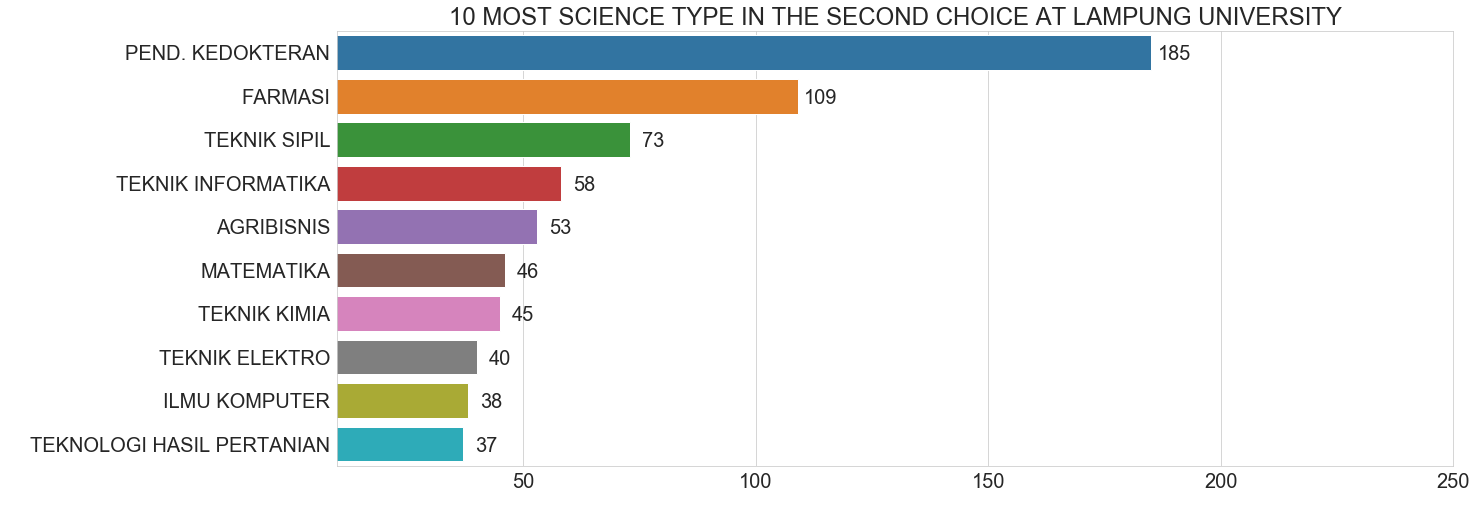

In [109]:
#visualisasi
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=summary_data_choice_2, x='choice', y='major_name_y')
plt.xlim(10,250)
plt.ylabel('MAJOR', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('10 MOST SCIENCE TYPE IN THE SECOND CHOICE AT LAMPUNG UNIVERSITY')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')
        
plt.show()

INFO DETAIL VISUALISASI DATA DI ATAS DENGAN TABLE

In [110]:
data_choice_2_table= data_science_score_science_unila[(data_science_score_science_unila.choice == 2)]
data_choice_2_table= data_choice_2_table.groupby(by=['major_name','capacity'])[['avg_score','choice']].agg({'avg_score':'mean','choice':'sum'})

In [111]:
data_choice_2_table

,,avg_score,choice
major_name,capacity,,
AGRIBISNIS,54,519.146226,106
AGRONOMI,45,500.913043,46
AGROTEKNOLOGI,31,523.662037,54
ARSITEKTUR,28,535.235294,68
BIOLOGI,45,513.666667,60
BIOLOGI TERAPAN,18,503.662500,40
BUDIDAYA PERAIRAN,31,496.671875,32
FARMASI,32,516.881881,218
FISIKA,63,514.613971,68
